<a name = "inicio"></a>
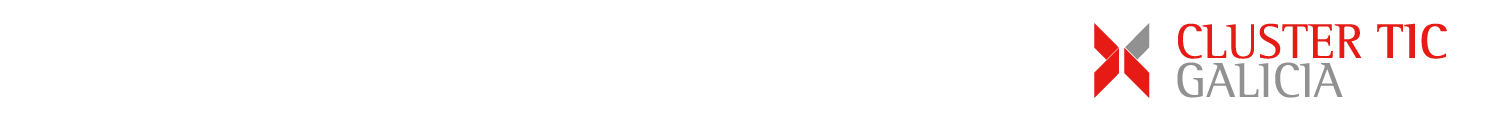

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Visualizaciones categóricas</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")

Aun cuando las funciones vistas hasta ahora también pueden servir en casos en los que alguna de las variables sea cualitativa -de hecho, las hemos utilizado para definir variables visuales como el color o el tamaño de los marcadores-, en casos como el descrito puede resultar útil recurrir a gráficas más especializadas. En Seaborn, estas gráficas más orientadas a mostrar distribuciones o relaciones implicando variables categóricas son ofrecidas por una función a nivel de figura: [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html). En función del valor del parámetro **kind**, esta función mostrará una gráfica u otra.

Seaborn divide estas gráficas en tres familias. Se indica a continuación el nombre de la gráfica, el de la función a nivel de ejes equivalente y el valor que tiene que tomar el parámetro *kind*:

* **Diagramas de dispersión categóricos**:
    * **Strip plot**: stripplot() (kind = "strip", valor por defecto)
    * **Gráfico de colmena**: swarmplot() (kind = "swarm")
* **Gráficas de distribución categórica**:
    * **Gráfico de caja**: boxplot() (kind = "box")
    * **Gráfico de violín**: violinplot() (kind = "violin")
    * **Boxen plot**: boxenplot() (kind = "boxen")
* **Gráficas de estimación categórica**:
    * **Gráfico de puntos**: pointplot() (kind = "point")
    * **Gráfico de barras**: barplot() (kind = "bar")
    * **Count plot**: countplot() (kind = "count")

En aquellos casos en los que no hay una buena traducción al español ("*Count plot*"), se ha dejado con el nombre en inglés.

Estas familias de gráficas representan la información usando diferentes tipos de granularidad o enfoques. En las siguientes secciones revisaremos todas ellas.

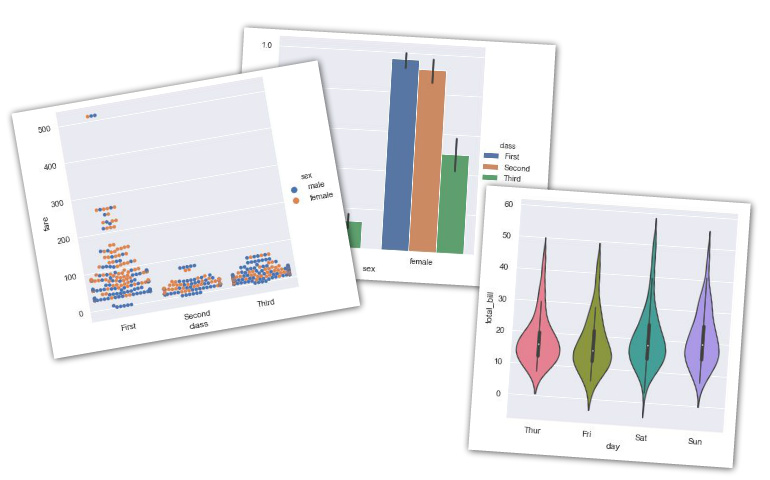

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Diagramas de dispersión categóricos

La primera de las familias de funciones se encarga de generar diagramas de dispersión para variables categóricas, mostrando éstas en el eje $x$ y la variable cuantitativa en el eje $y$, representando cada valor por un punto. Hay dos enfoques alternativos: el *strip plot* y el *swarm plot*.

### strip plot

La primera de estas alternativas es el strip plot, que puede ser mostrado usando la función a nivel de figura [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) con el argumento *kind = "strip"* (o sin argumento, ya que el mencionado valor es el que toma por defecto) o con la función a nivel de ejes [seaborn.stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html). Como se ha comentado, esta función sitúa la variable categórica en el eje $x$ y la variable cuantitativa en el eje $y$, mostrando con un punto cada uno de los valores. Para poder distinguir los puntos en el caso de que estén muy próximos, por defecto se aplica un "temblor" (*jitter*) a los puntos para separarlos del eje vertical de forma aleatoria:

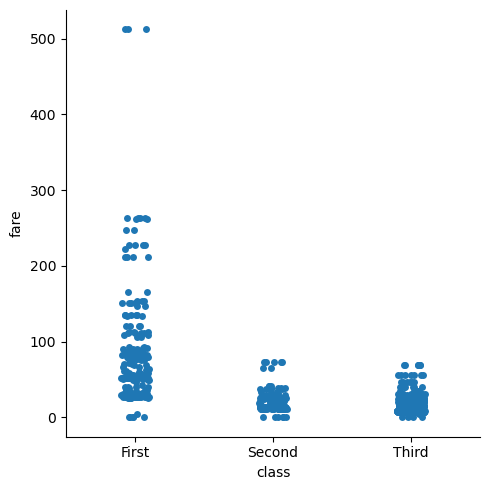

In [4]:
sns.catplot(data = titanic, x = "class", y = "fare")
plt.show()

En la anterior imagen se muestra el precio pagado por el billete por los pasajeros del Titanic en función de la clase del pasaje (primera, segunda o tercera).

El parámetro **jitter** controla la magnitud del temblor. Por ejemplo, podemos aumentar el ancho de las barras aumentando el temblor aplicado:

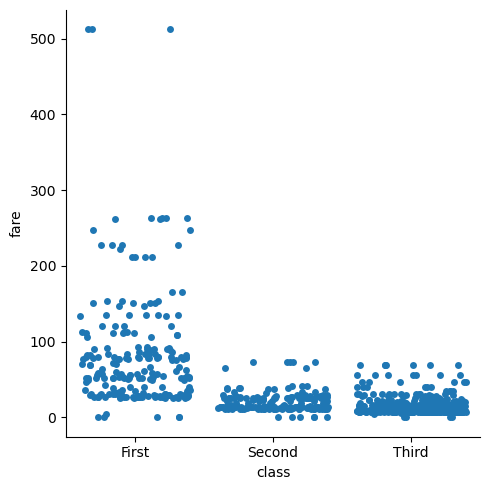

In [5]:
sns.catplot(data = titanic, x = "class", y = "fare", jitter = 0.4)
plt.show()

También puede ser desactivado estableciendo el valor del parámetro *jitter* a *False*:

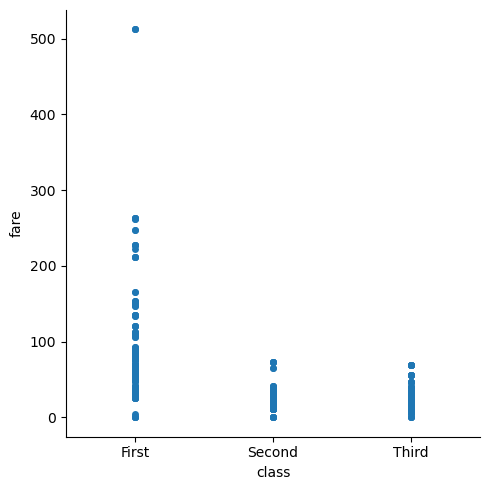

In [6]:
sns.catplot(data = titanic, x = "class", y = "fare", jitter = False)
plt.show()

También podemos mostrar la gráfica horizontalmente intercambiando los argumentos $x$ e $y$:

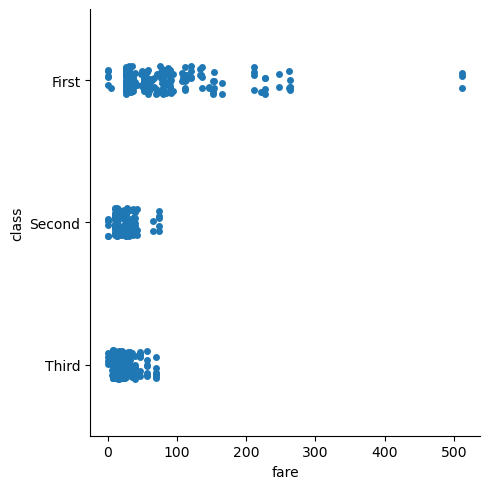

In [7]:
sns.catplot(data = titanic, x = "fare", y = "class")
plt.show()

Normalmente este sencillo cambio suele ser suficiente para que Seaborn sea capaz de reconocer la variable cualitativa. En el caso de que la cardinalidad de ésta sea elevada y Seaborn no sea capaz de distinguirla de la variable cuantitativa, tanto la función *sns.catplot* como la función *sns.stripplot* aceptan el parámetro **orient**, pudiendo tomar los valores "h" o "v", para especificar la orientación de la gráfica de forma explícita.

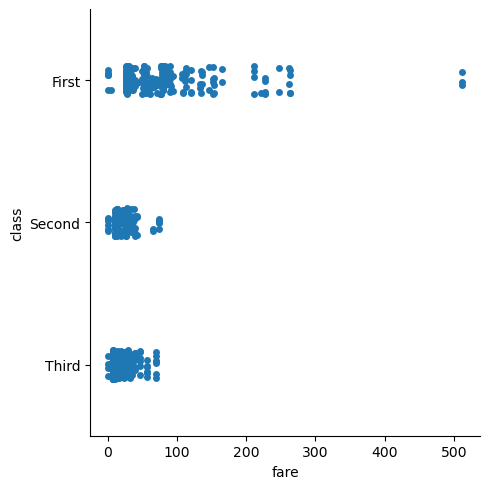

In [8]:
sns.catplot(data = titanic, y = "class", x = "fare", orient = "h")
plt.show()

Podemos añadir una dimensión adicional recurriendo al parámetro **hue** que aplica un color a los puntos en función de los valores que tome otra variable. Por ejemplo, si queremos mostrar en las visualizaciones anteriores la diferencia entre sexos:

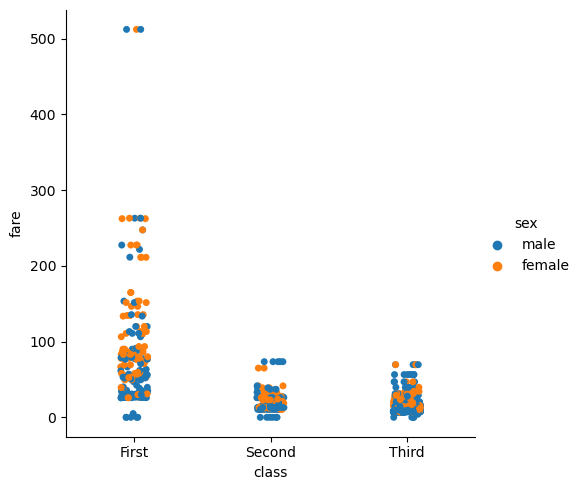

In [9]:
sns.catplot(data = titanic, x = "class", y = "fare", hue = "sex")
plt.show()

Esta variable visual -el color- es la única soportada por la función *sns.catplot()* o por las funciones a nivel de ejes equivalentes (no soportan ni el parámetro *style* ni *size*).

### Swarm plot

La segunda alternativa es el denominado *swarm plot*, *beeswarm* o *gráfico de enjambre* o *de colmena*. Este tipo de gráfica se muestra al ejecutar la función a nivel de figura [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) con el argumento *kind = "swarm"* o al ejecutar la función a nivel de ejes equivalente, [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). Estas funciones generan gráficas semejantes a las generadas por *seaborn.stripplot()*, pero aplicando a la posición de los puntos cierto algoritmo de forma que éstos no solapen, lo que ofrece una mejor visualización a costa de dejar de ser útil para conjuntos de datos muy grandes:

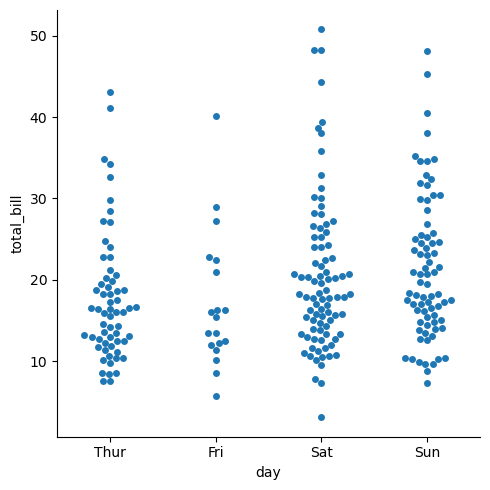

In [10]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "swarm")
plt.show()

Como puede apreciarse, esta visualización permite obtener una mejor idea de la distribución de los valores, aunque el área ocupada por cada barra aumenta según aumenta el número de puntos a mostrar.

Al igual que ocurría con el strip plot, podemos mostrar la gráfica horizontalmente intercambiando los argumentos $x$ e $y$:

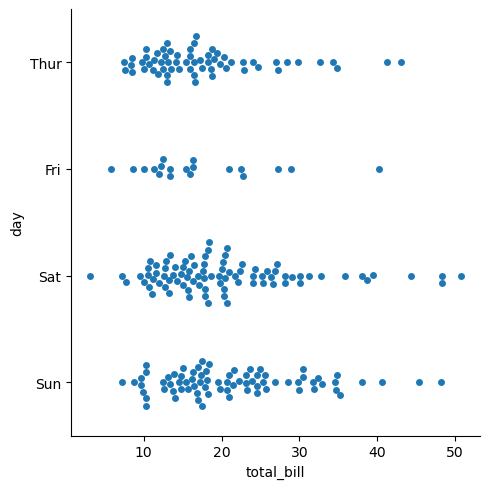

In [11]:
sns.catplot(data = tips, x = "total_bill", y = "day", kind = "swarm")
plt.show()

-ya sabemos que cuando esto no sea suficiente, disponemos del parámetro **orient** que nos permite definir explícitamente la orientación del gráfico-.

También podemos añadir una dimensión con el parámetro **hue** que regula el color de los puntos (ya se ha comentado que esta variable visual es la única soportada por la función *sns.catplot()* y por las funciones a nivel de ejes equivalentes):

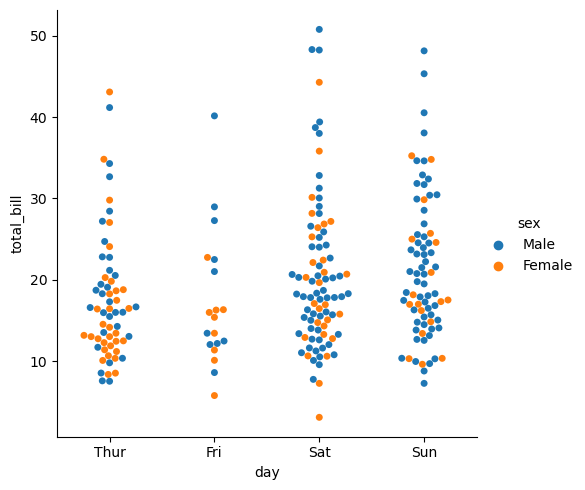

In [12]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "swarm", hue = "sex")
plt.show()

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Gráficas de distribución categórica

Tanto los *strip plots* como los *swarm plots* son extremadamente útiles para ver la distribución de las variables categóricas... siempre que el conjunto de datos no sea demasiado grande pues, llegado cierto tamaño, ninguna de las dos funciones mencionadas permiten visualizar las distribuciones correctamente: en el primer caso porque la columna de puntos pasa a convertirse en una columna sólida en la que no es posible distinguir los puntos, y en el segundo caso porque el espacio requerido por los puntos, al no solapar, es excesivamente grande. En estos casos es preferible recurrir a métodos que agreguen la información relativa a la distribución. Seaborn nos ofrece tres alternativas: el **box plot**, el **boxen plot** y el **violin plot**. Veámoslos uno a uno.

### Box plot

El *diagrama de caja*, también conocido como *diagrama de caja y bigote* o *box plot*, resume la distribución de los datos mostrándonos la posición de sus cuartiles y de los valores atípicos (outliers). Se muestra en Seaborn con la función [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) y el argumento *kind = "box"* o con la función [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Por defecto, tras calcular la mediana y los cuartiles Q1 y Q3, se calcula el conocido como rango intercuantil (IQR = Q3 - Q1). Los "*bigotes*" o "*whiskers*" (la línea que sale de la caja) se extienden -por defecto- hasta cubrir 1.5 veces el rango intercuantil por debajo y por encima de Q1 y de Q3, respectivamente. Todos los puntos fuera de este rango son considerados valores atípicos y son mostrados como puntos individuales:

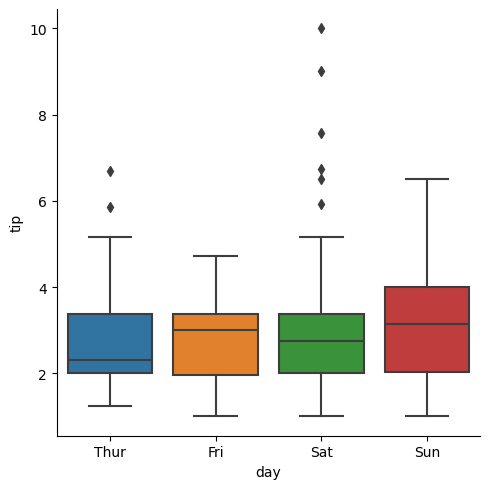

In [13]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "box")
plt.show()

En el anterior gráfico distinguimos los cuartiles Q1 y Q3 (límites superior e inferior de las "cajas", distancia a la que nos hemos referido como rango intercuantil), la mediana (línea horizontal dentro de la caja) y los valores considerados "normales" entre los topes superior e inferior de las líneas verticales (los topes representan 1.5 veces el rango intercuantil). Fuera de estos límites vemos los outliers o valores anómalos.

La distancia más allá de la cual un valor se considera anómalo se puede personalizar con el parámetro **whis**. Éste toma, por defecto, el mencionado valor de 1.5. Obsérvese cómo cambia la gráfica si aumentamos este valor a, por ejemplo, 3:

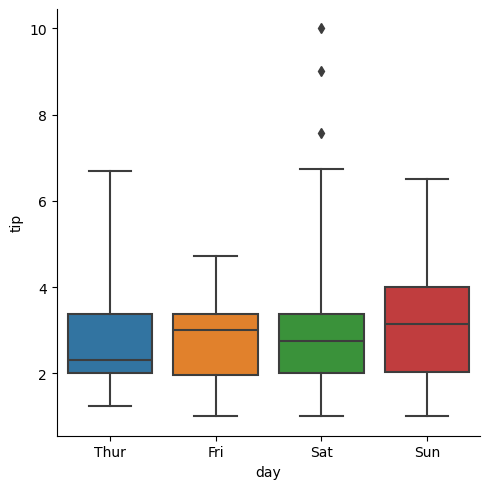

In [14]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "box", whis = 3)
plt.show()

Ahora, los valores que eran outliers en la primera gráfica para el jueves ya son todos considerados normales. Y los outliers del sábado también han disminuido en número de forma considerable.

En este tipo de gráfica seguimos teniendo acceso al parámetro **hue**:

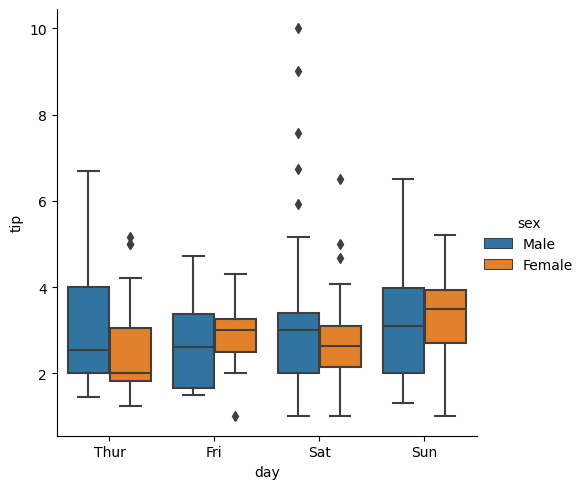

In [15]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "box", hue = "sex")
plt.show()

Vemos que, si en la categoría de "diagramas de dispersión categóricos" se mostraba cada punto de un color distinto, ahora que se está agregando la información, la alternativa es dividir cada caja según los valores que tome la categoría que se indique ("*sex*", en este caso).

De todas formas, este enfoque está limitado por el número de valores posibles que tome dicha categoría. En el ejemplo anterior eran dos valores: *Male* y *Female*, pero veamos el resultado si utilizamos como variable de segmentación "*size*", representando el número de comensales:

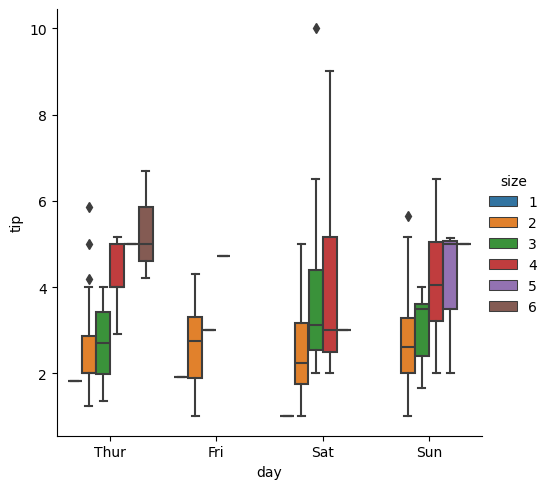

In [16]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "box", hue = "size")
plt.show()

Aun cuando Seaborn hace un bastante buen trabajo mostrando las cajas para cada valor de la variable de segmentación, la interpretación de la gráfica comienza a resultar más compleja. Una opción, por supuesto, es aumentar el tamaño de la figura:

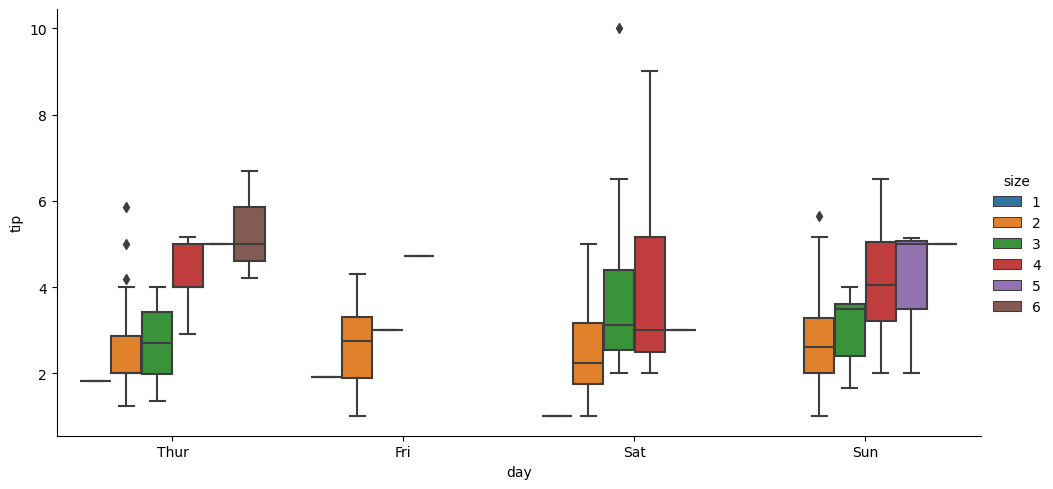

In [17]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "box", hue = "size", aspect = 2)
plt.show()

o recurrir a los "facets" (mostrar en diferentes gráficas los datos correspondientes a cada valor de la variable categórica) que serán revisados más adelante:

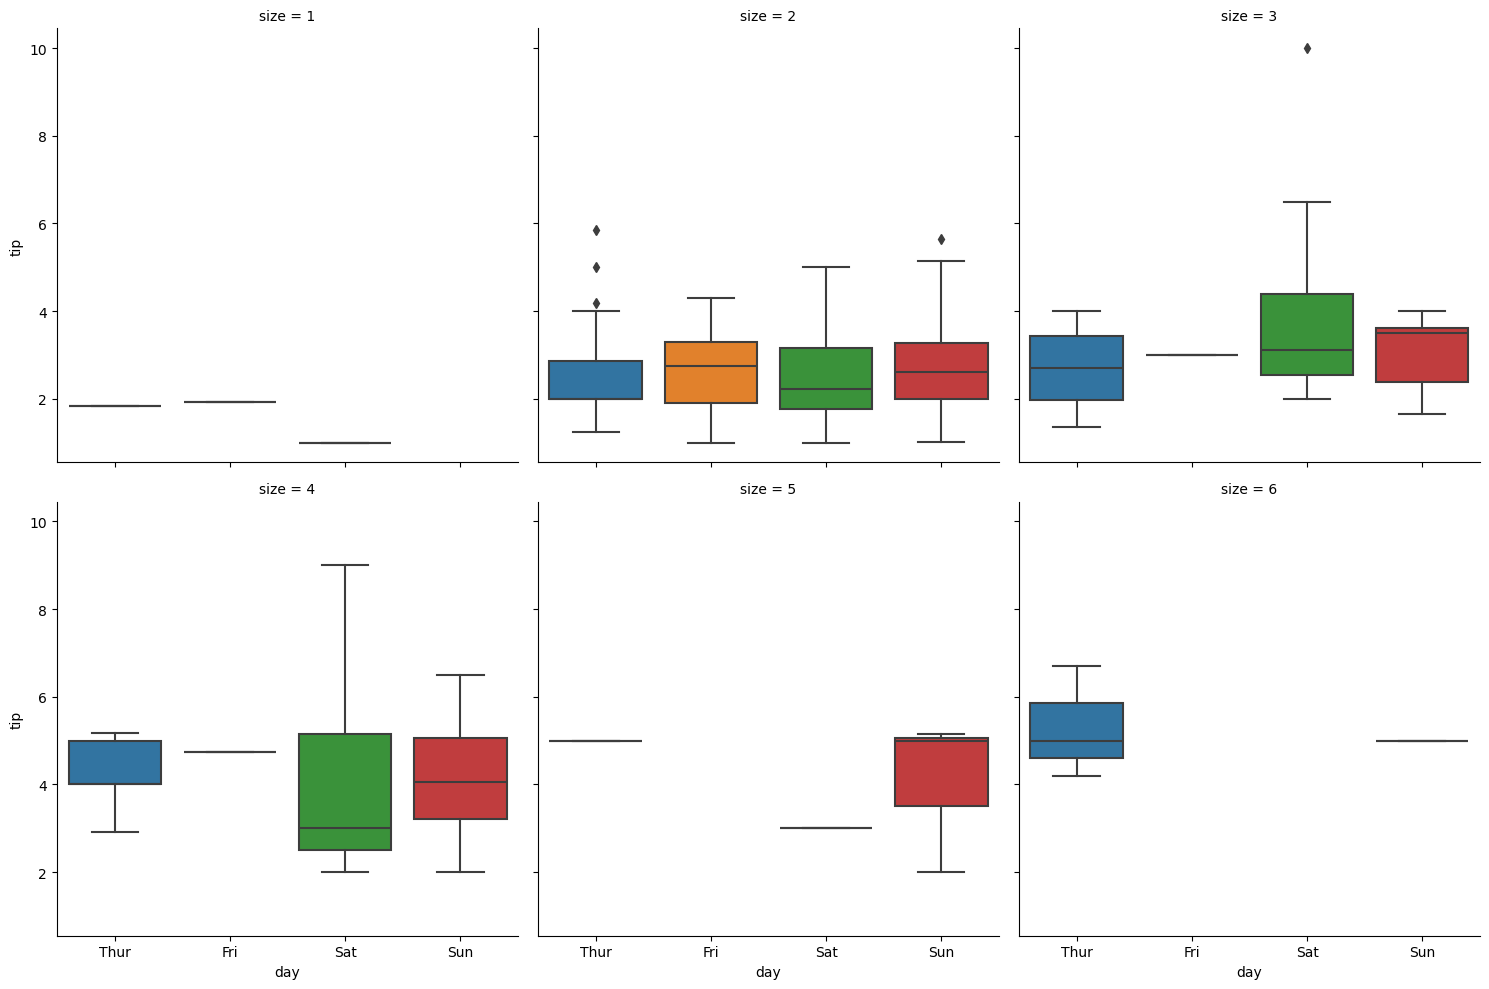

In [18]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "box", col = "size", col_wrap = 3)
plt.show()

En la visualización anterior se ha recurrido a mostrar las gráficas con un máximo de tres por fila usando el parámetro **col_wrap**.

Y nada nos impide utilizar esta función con una única variable, mostrándose su distribución:

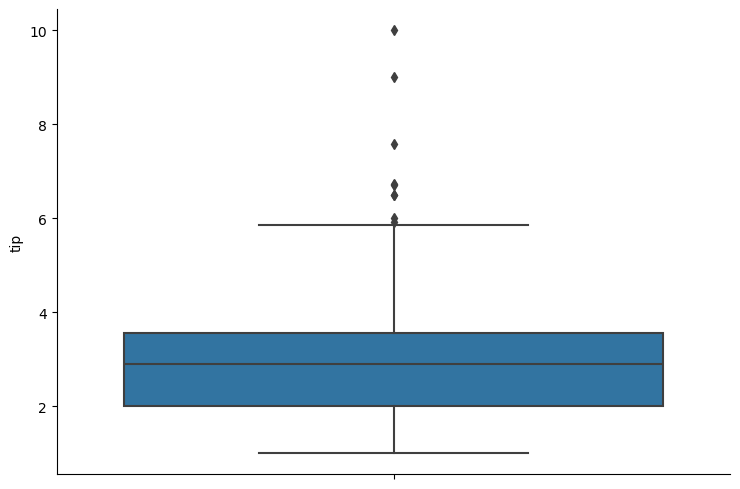

In [19]:
sns.catplot(data = tips, y = "tip", kind = "box", aspect = 1.5)
plt.show()

### Boxen plot

Este tipo de gráficas, obtenibles con el argumento *kind = "boxen"* de la función [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) o con la función a nivel de ejes [seaborn.boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html), es semejante a las box plots vistas, con la diferencia de que éstas muestran un mayor número de cuantiles, lo que supone mayor información transmitida a costa de incrementar algo la complejidad de la gráfica.

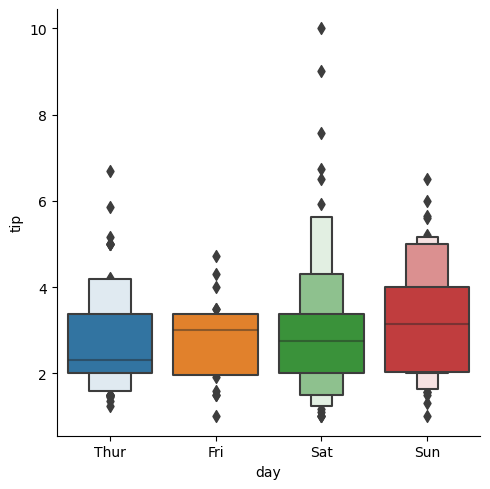

In [20]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "boxen")
plt.show()

El número de cajas a mostrar depende del tamaño de los datos y de su distribución estadística. Así, datos con mayor variabilidad y mayor número de valores anómalos pueden justificar la adición de más cajas para capturar adecuadamente su variabilidad.

También podemos recurrir al parámetro *hue* para añadir una nueva dimensión, lo que se traduce en la creación de nuevos bloques de cajas para cada valor de la variable categórica de segmentación:

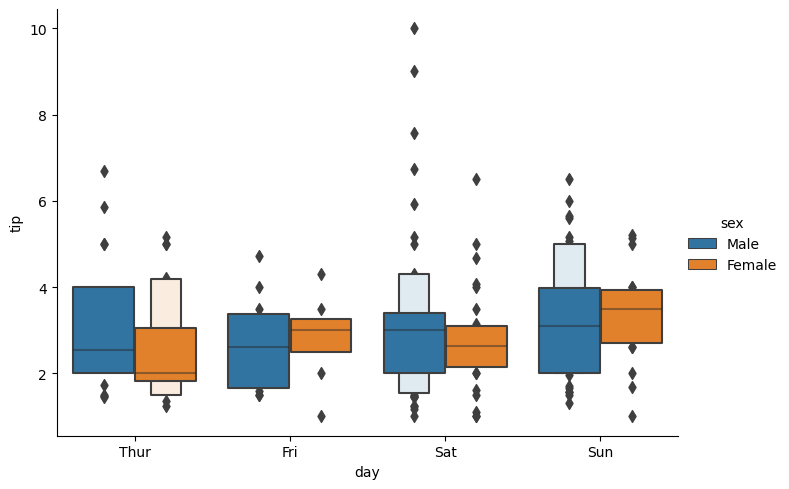

In [21]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "boxen", hue = "sex", aspect = 1.4)
plt.show()

Si, por último, aplicamos esta función a una única variable, obtenemos una visualización de su distribución:

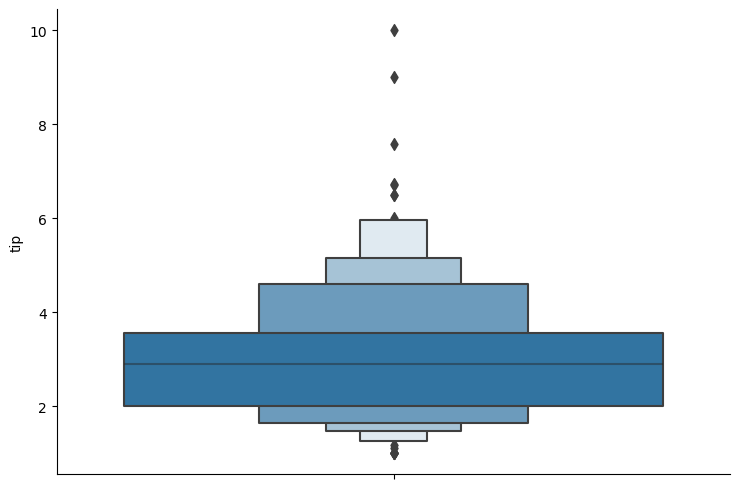

In [22]:
sns.catplot(data = tips, y = "tip", kind = "boxen", aspect = 1.5)
plt.show()

### Violin plot

El *violin plot* combina la funcionalidad del box plot -mostrando los cuartiles de la distribución- y la de la estimación de densidad kernel. Para crearla podemos recurrir a la función a nivel de figura [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) con el argumento *kind = "violin"* o a la función a nivel de ejes [seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Ésta es una forma muy atractiva de mostrar la distribución de un conjunto de datos con respecto a una variable categórica, pero debemos tener en cuenta que no siempre resulta sencilla de interpretar y que, para conjuntos de datos pequeños, la estimación de densidad kernel puede no transmitir con detalle el perfil real de los datos, mostrándolo mucho más suave de lo que realmente es.

Veamos un primer ejemplo de este tipo de gráfica:

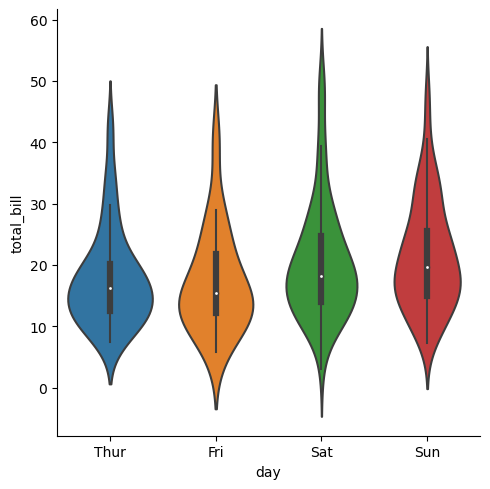

In [23]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "violin")
plt.show()

Seguimos viendo la caja del *box plot* -ahora reducida a una linea negra de cierto grosor en el centro de cada "violín". En el interior de la línea vemos un pequeño punto blanco que representa la mediana y, lógicamente, los límites de la línea más gruesa representan los cuartiles Q1 y Q3. Por encima y por debajo de estos se aprecian los bigotes o *whiskers*.

En este ejemplo, la gráfica se ha mostrado vertical pues hemos pasado al parámetro $x$ la variable categórica y al parámetro $y$ la variable cuya distribución queremos analizar. Basta intercambiar estos parámetros para cambiar la forma de la gráfica:

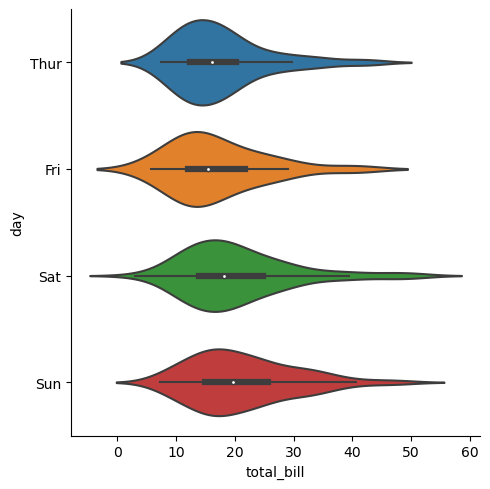

In [24]:
sns.catplot(data = tips, x = "total_bill", y = "day", kind = "violin")
plt.show()

Los parámetros disponibles en este tipo de gráficas proceden del enfoque ofrecido por el "box plot" y por el ofrecido por el "kde". Así, podemos determinar el "*bandwidth*" que vimos en la gráfica *sns.kdeplot()* usando el parámetro **bw_method**. Este parámetro controlaba el grado de ajuste de la KDE a los datos:

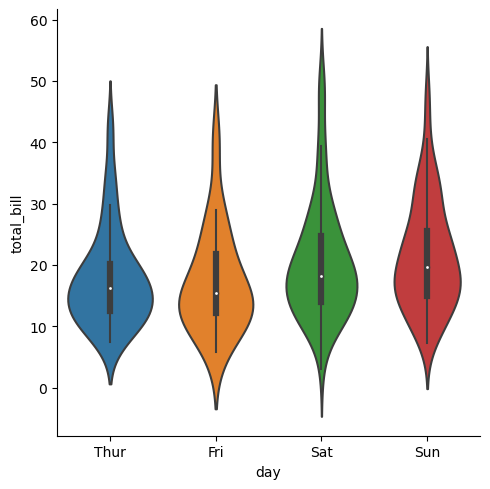

In [25]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "violin", bw_method = 0.25)
plt.show()

El parámetro **hue** nos permite, aquí también, crear nuevos violines para cada uno de los valores de la variable categórica que se indique:

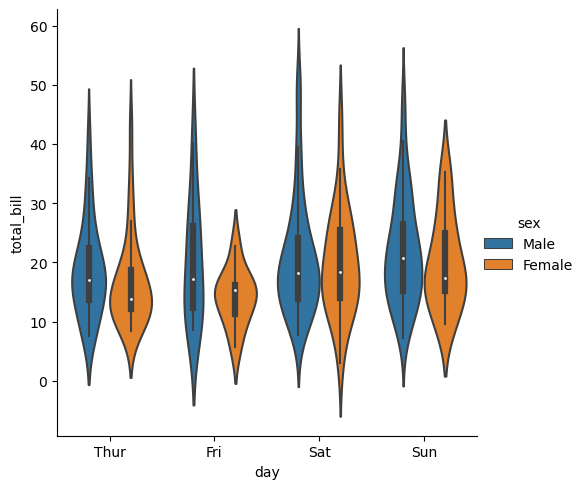

In [26]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "violin", hue = "sex")
plt.show()

Al utilizar el parámetro *hue* para establecer un criterio de segmentación, cuando éste toma solo dos valores -como en el ejemplo anterior-, es posible agregar el parámetro **split** con el valor *True* para, en lugar de duplicar los violines, separar cada uno en dos mitades mostrando la distribución de los datos para cada valor de la variable categórica. Es decir, la gráfica anterior es semejante a la siguiente:

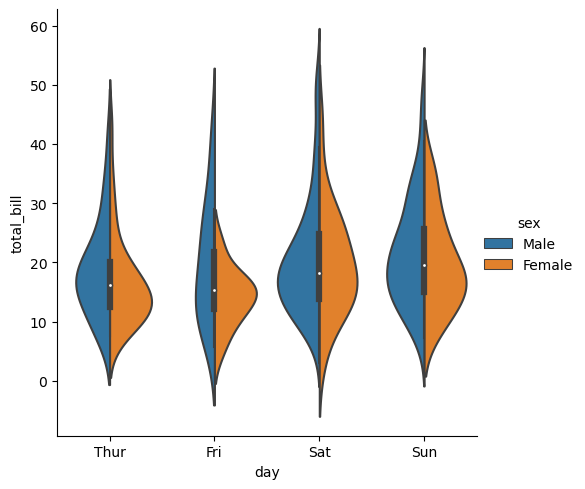

In [27]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "violin", hue = "sex", split = True)
plt.show()

Si la variable categórica usada tomase más de dos valores, la función devolvería un error.

Por último, es necesario comentar que el interior del violín puede ser personalizado utilizando el parámetro **inner**, parámetro que puede tomar los valores “*box*”, “*quartile*”, “*point*”, “*stick*” o *None*. El valor por defecto es "*box*", pero cambiándolo a "*quartile*", por ejemplo, se muestran líneas horizontales señalando la posición de los cuartiles. Se muestra a continuación el resultado de utilizar las cuatro opciones comentadas usando la función equivalente *seaborn.violinplot()*:

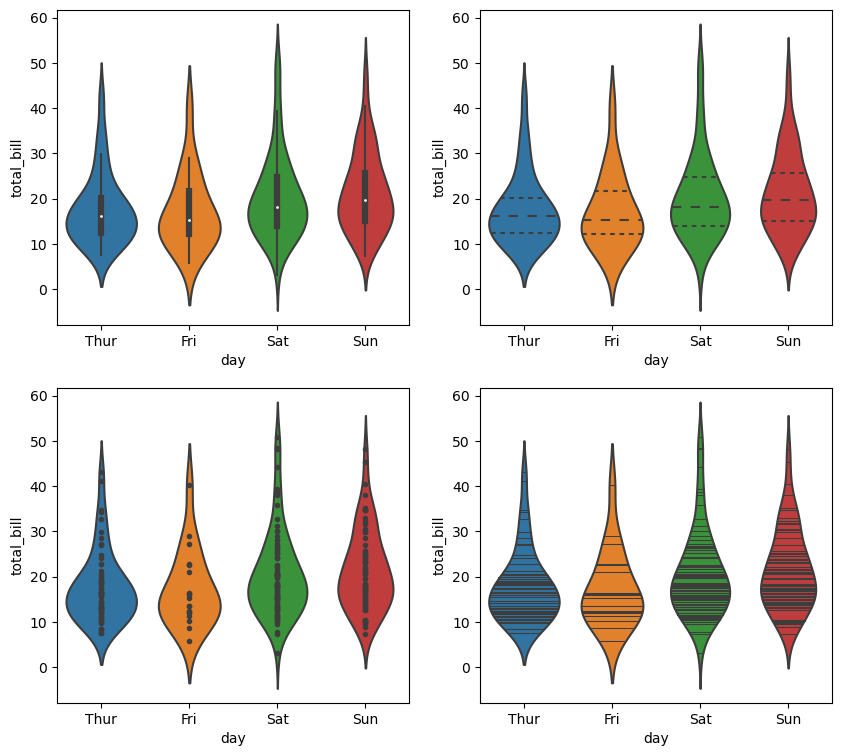

In [28]:
fig, ax = plt.subplots(2, 2, figsize = (10, 9))
sns.violinplot(data = tips, x = "day", y = "total_bill", inner = "box", ax = ax[0, 0])
sns.violinplot(data = tips, x = "day", y = "total_bill", inner = "quartile", ax = ax[0, 1])
sns.violinplot(data = tips, x = "day", y = "total_bill", inner = "point", ax = ax[1, 0])
sns.violinplot(data = tips, x = "day", y = "total_bill", inner = "stick", ax = ax[1, 1])
plt.show()

La opción *inner = None* simplemente oculta la caja en el interior de cada violín.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Gráficas de estimación categórica

En ciertos casos, lo que nos interesa no es visualizar la distribución de una o más variables sino calcular una medida de tendencia central para cada uno de los bloque de datos resultantes de segmentar el conjunto de datos inicial según una variable cualitativa. Entre estas medidas de tendencia central típicamente encontramos la media aritmética, la mediana, la moda, etc. Dentro de esta familia de funciones se incluyen tres: el *gráfico de barras* -disponible en dos "sabores" y el *point plot*.

### bar plot

La función a nivel de figura [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) con el argumento *kind = "bar"* o la función a nivel de ejes [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) generan gráficos de barras que tienen un comportamiento ligeramente diferente al habitual: normalmente un gráfico de barras muestra el recuento de valores en cada categoría. Aun cuando esta funcionalidad también está contemplada en Seaborn, las funciones mencionadas van mucho más allá de un simple recuento: aplican una función que calcula una medida de tendencia central (por defecto es el valor medio) y muestran, aplicando [bootstrapping](https://es.wikipedia.org/wiki/Bootstrapping_(estad%C3%ADstica)), el intervalo de confianza del 95% para dicha medida.

Veamos un sencillo ejemplo. En la siguiente gráfica mostramos el valor medio de supervivencia para hombres y mujeres en el Titanic:

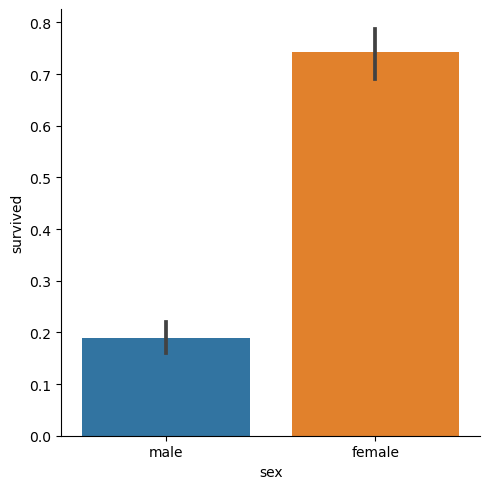

In [29]:
sns.catplot(data = titanic, x = "sex", y = "survived", kind = "bar")
plt.show()

Vemos en la parte superior de cada barra el intervalo del 95% de confianza para la medida de tendencia central calculada.

Tal y como ocurría con los gráficos de líneas con agregación, el parámetro **errorbar** controla esta opción:

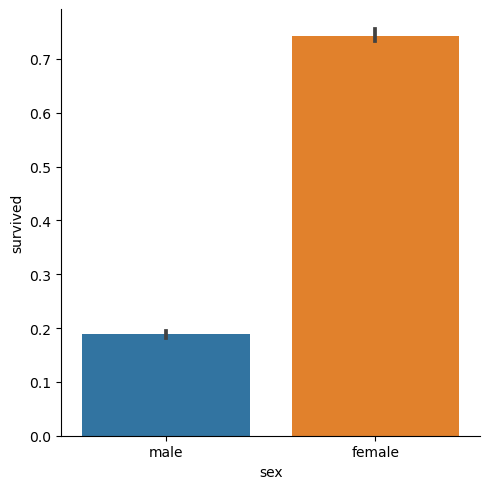

In [30]:
sns.catplot(data = titanic, x = "sex", y = "survived", kind = "bar", errorbar = ("ci", 30))
plt.show()

Pasando el valor *None* al parámetro *errorbar* simplemente desactivamos el intervalo de confianza.

Podemos recurrir al parámetro **hue** para dividir cada columna según los valores de una nueva variable categórica, aumentando el número de dimensiones mostradas en la gráfica. Por ejemplo, se muestra a continuación la gráfica anterior tras segmentar cada una de las dos barras según la categoría del camarote:

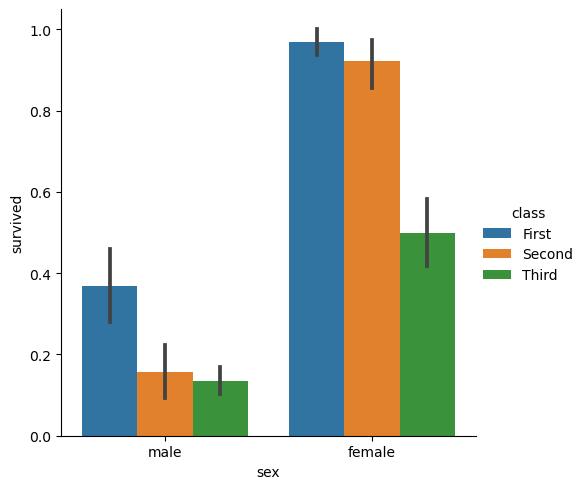

In [31]:
sns.catplot(data = titanic, x = "sex", y = "survived", kind = "bar", hue = "class")
plt.show()

Podemos mostrar la gráfica en vertical o en horizontal pasando a los parámetros $x$ e $y$ los valores adecuados:

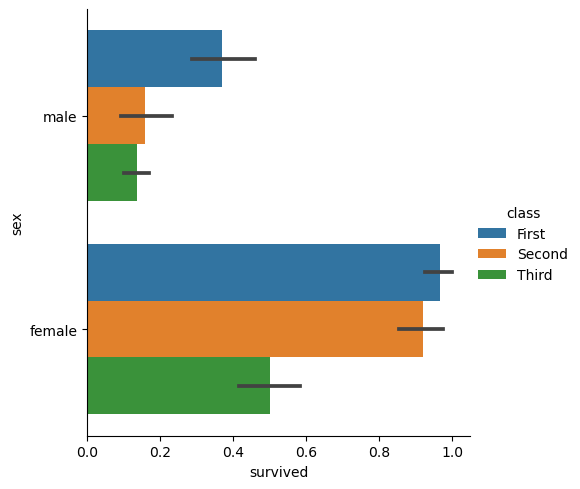

In [32]:
sns.catplot(data = titanic, x = "survived", y = "sex", kind = "bar", hue = "class")
plt.show()

En el caso de que Seaborn no sea capaz de inferir cuál es la variable categórica, siempre es posible establecer el valor del parámetro **orient**.

Podemos determinar la función de agregación a utilizar con el parámetro **estimator**. En el siguiente ejemplo, mostramos en la gráfica de barras la desviación estándar de los valores que definen si el pasajero en cuestión sobrevivió o no (en función de su sexo y categoría del camarote):

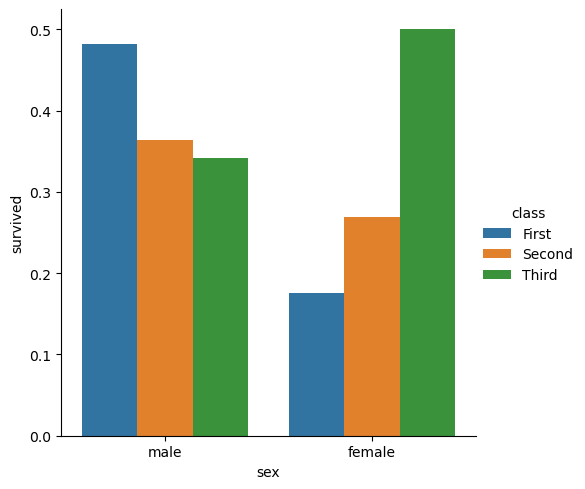

In [33]:
sns.catplot(
    data = titanic,
    x = "sex",
    y = "survived",
    kind = "bar",
    hue = "class",
    estimator = np.std,
    errorbar = None
)
plt.show()

### Count plot

Un caso concreto del gráfico de barras -y el más frecuente, por otro lado- es aquel en el que queremos que la longitud de la barra sea proporcional al número de elementos representado por ella. En Seaborn podemos conseguir esta funcionalidad con la función a nivel de figura [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) con el argumento *kind = "count"* o con la función a nivel de ejes [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html). Por ejemplo, si deseamos saber el número de propinas por día de la semana del dataset *tips*:

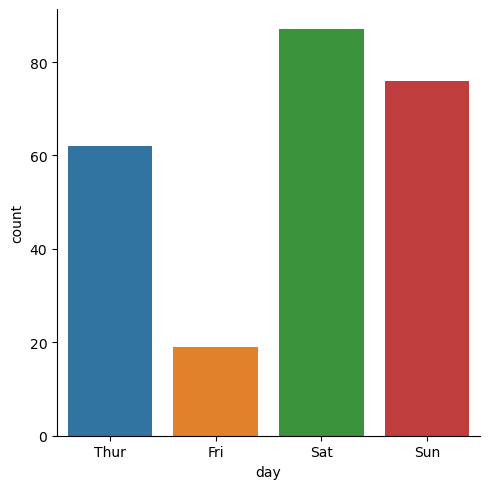

In [34]:
sns.catplot(data = tips, x = "day", kind = "count")
plt.show()

Sorprendentemente, Seaborn no ofrece ninguna forma de mostrar las etiquetas sobre las columnas. Para esto no nos queda más remedio que calcularlas nosotros y mostrarlas haciendo uso de las herramientas de Matplotlib:

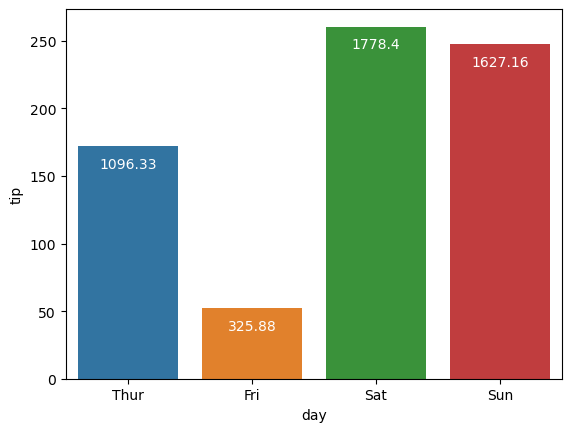

In [35]:
groupedvalues = tips.groupby('day')[["total_bill", "tip"]].sum().reset_index()
g = sns.barplot(data = groupedvalues, x = 'day', y = 'tip')
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.tip - 16, round(row.total_bill, 2), color = 'white', ha = "center")

Para mostrar el gráfico horizontalmente, basta indicar con el parámetro $y$ la variable cuantitativa (en lugar de hacerlo con el parámetro $x$):

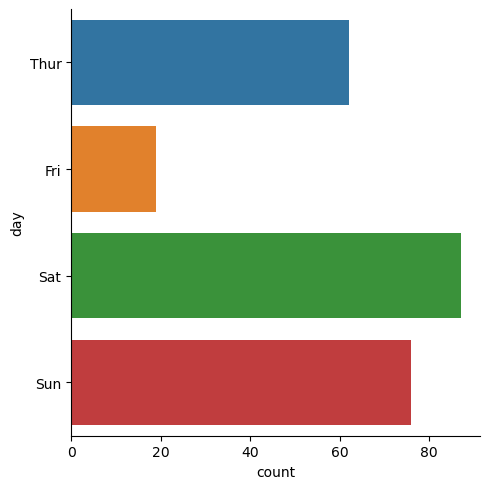

In [36]:
sns.catplot(data = tips, y = "day", kind = "count")
plt.show()

Podemos crear gráficos de barras agrupadas -y añadir, por lo tanto, una dimensión adicional a la gráfica- recurriendo al parámetro **hue**, que provoca que cada barra se multiplique por el número de valores distintos de la variable indicada por este argumento:

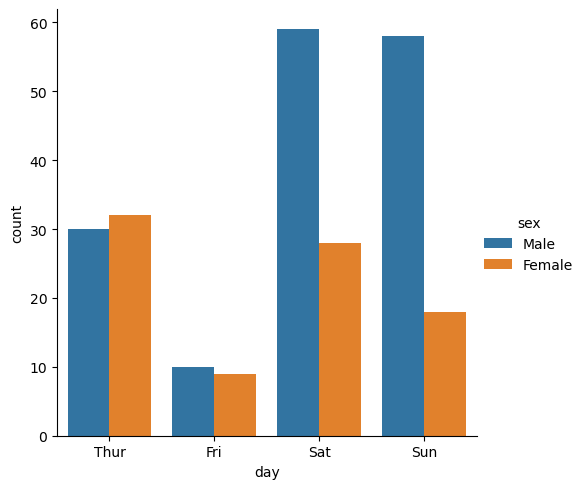

In [37]:
sns.catplot(data = tips, x = "day", kind = "count", hue = "sex")
plt.show()

### Point plot

Los point plots son otra alternativa a las gráficas de barras (también muestran por defecto el valor medio junto a un intervalo de confianza del 95%), pero en lugar de mostrar barras, simplemente muestra puntos a la altura adecuada y los une con una línea, reforzando el mensaje que hay detrás de la variación de un valor al siguiente. Se consiguen con la función a nivel de figura [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) con *kind = "point"*, o con la función a nivel de ejes [seaborn.pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html).

Por ejemplo, si deseamos mostrar la variación a lo largo de los días de la semana del valor medio de las propinas, podríamos conseguirlo con esta función:

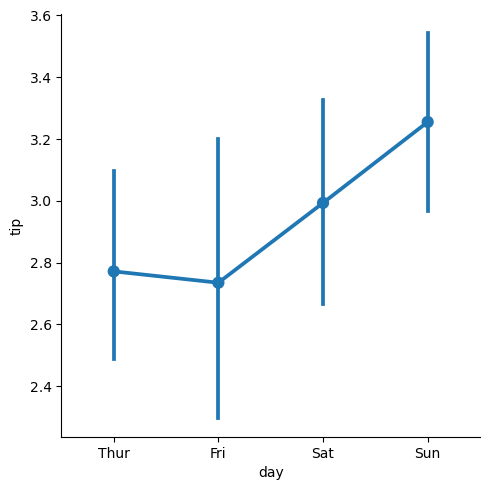

In [38]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "point")
plt.show()

Si hacemos referencia a una nueva variable con el parámetro **hue**
, se crean tantos conjuntos de puntos (y líneas uniéndolos) como valores tome dicha variable. En el ejemplo anterior podemos separar la línea en dos, una para cada sexo, con *hue = "sex"*:

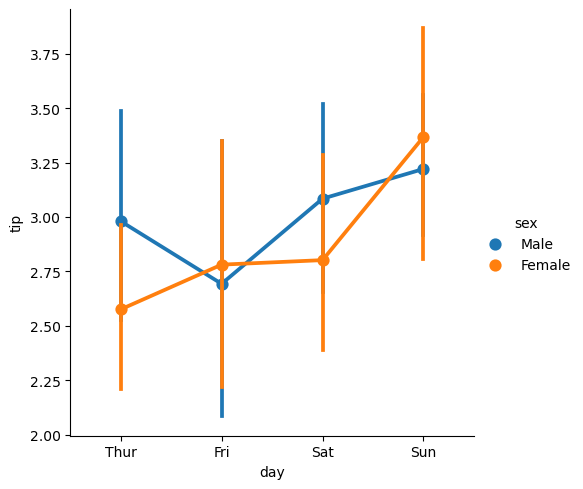

In [39]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "point", hue = "sex")
plt.show()

Si, como en el caso anterior, las líneas verticales correspondientes al intervalo de confianza se solapan, es posible mostrar los topes de dichas líneas con el parámetro **capsize**:

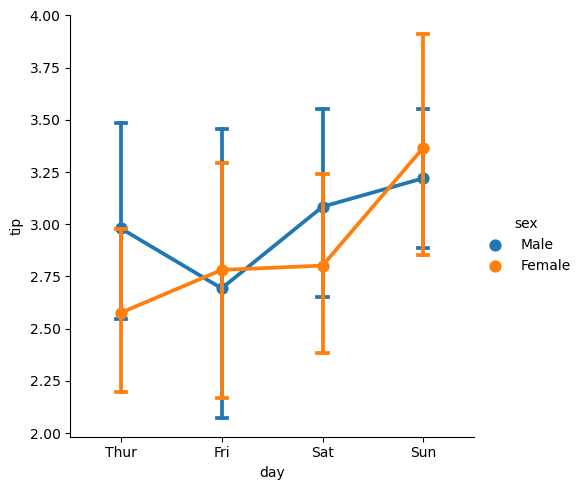

In [40]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "point", hue = "sex", capsize = 0.1)
plt.show()

Este recurso facilita la interpretación de la longitud de las líneas en cuestión a costa de aumentar ligeramente la complejidad de la gráfica.

Como se ha comentado, por defecto se muestra el valor medio de los valores correspondientes. Esta función puede ser controlada usando el parámetro **estimator**. Y, también aquí, el parámetro **errorbar** controla el tamaño del intervalo de confianza.

Si deseamos contar el número de valores, podemos utilizar la función *len*:

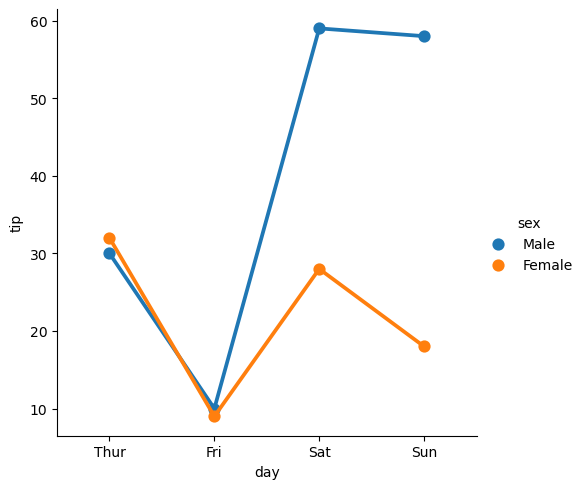

In [41]:
sns.catplot(data = tips, x = "day", y = "tip", kind = "point", hue = "sex", estimator = len)
plt.show()

Esta gráfica acepta parámetros como **markers** o **linestyles**, para definir los símbolos a mostrar en los puntos para los que hay datos y los estilos de las líneas, respectivamente:

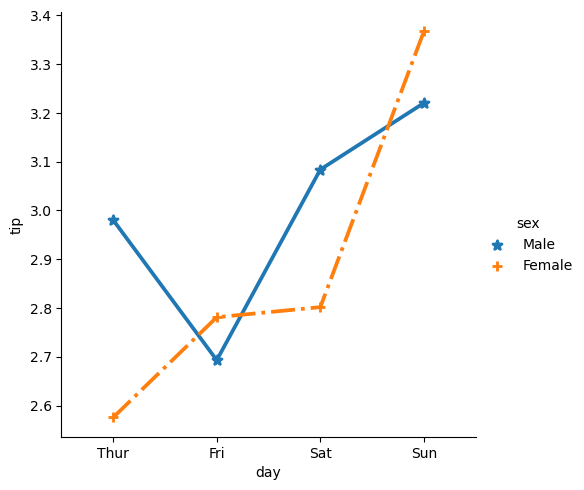

In [42]:
sns.catplot(
    data = tips,
    x = "day",
    y = "tip",
    kind = "point",
    hue = "sex",
    errorbar = None,
    markers = ["*", "+"],
    linestyles = ["-", "-."]
)
plt.show()

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>